# 09_03: Visualizing distributions

In [2]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

We continue to analyze the income distributions in the US and in China by plotting them. 

In [71]:
incomes = pd.read_csv('incomes2.csv').set_index(['country', 'year'])
incomes['log10_daily'] = np.log10(incomes.yearly / 365.25)

The summary statistics that we described in the last video are brought together visually in a **box plot**. The box itself extends from the 25% to the 75% quantiles, with a line at the median. The whiskers are the minimum and maximum values in the dataset, but only if they do not stray too far from the 25% and 75% quantiles (not more than one-and-a-half times the interquartile range between 25% and 75%).
If they do, they are considered outliers and they are plotted individually.

That's what we see in the US income data for some wealthy individuals. (Remember they are just representative points, not actual people.)

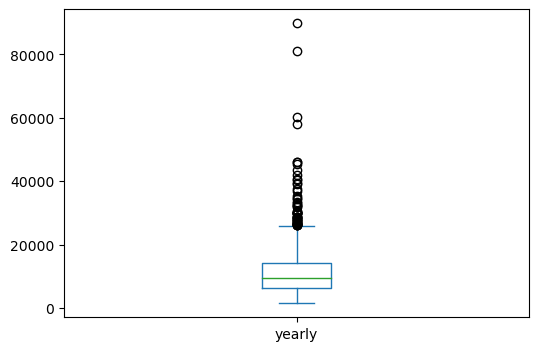

In [73]:
incomes.loc['USA', 1965].yearly.plot(kind='box', figsize=(6,4));

To compare China and U.S. in 1965, we need to make a single dataframe.

We need to remember the slightly multi-indexing syntax, and we use `reset_index` to make the country available as a regular column. Then the pandas box plot can be told to plot the column `yearly`, grouped by `country`.

The scales are so different that we don't see much; it's better to make boxplots of the logarithm of the income.

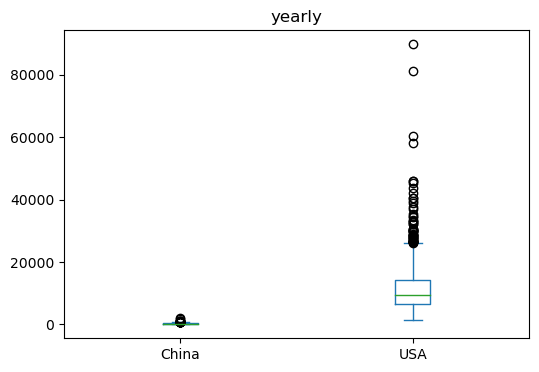

In [74]:
incomes.loc[pd.IndexSlice[:,1965], :].reset_index().plot(kind='box', column='yearly', by='country', figsize=(6,4));

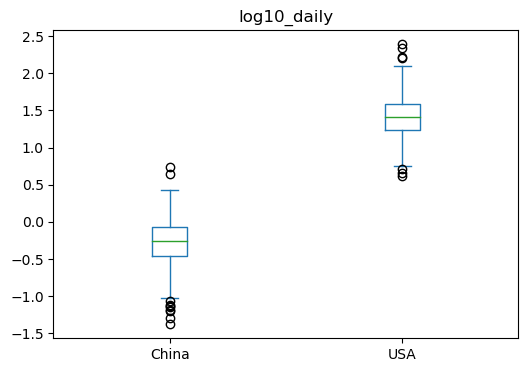

In [76]:
incomes.loc[pd.IndexSlice[:,1965], :].reset_index().plot(kind='box', column='log10_daily', by='country', figsize=(6,4));

A much richer visualization of a distribution is a _histogram_, which divides the data into a set of contiguous _bins_ of equal width, then for each bin shows a rectangle with height proportional to the number of datapoints that fell into the bin.

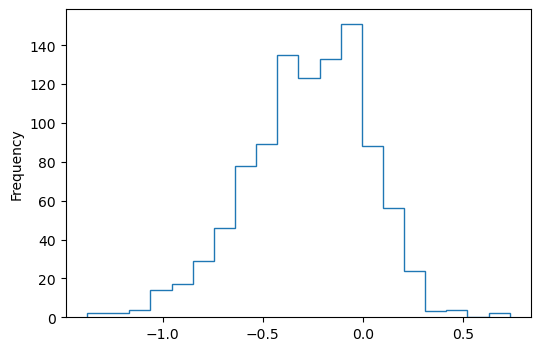

In [86]:
# histtype = 'step' removes the color fill
incomes.loc['China', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, figsize=(6,4));

We can enhance the histogram by marking the locations of a few descriptive statistics, using vertical lines (`axvline` in matplotlib). We very the line style for readability.

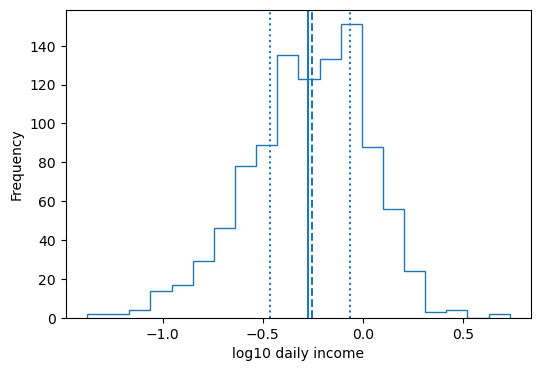

In [116]:
data = incomes.loc['China', 1965].log10_daily
data.plot(kind='hist', histtype='step', bins=20, figsize=(6,4))

pp.xlabel('log10 daily income')
pp.axvline(data.mean())
pp.axvline(data.median(), linestyle='--')
pp.axvline(data.quantile(0.25), linestyle=':')
pp.axvline(data.quantile(0.75), linestyle=':')

A **density** plot is effectively a smoothed histogram, which associates an estimated frequency with every value on the x axis. To compare density and histogram, I have *normalized* the histogram by setting density=True, so that the area under the curve is the same for both. 

It is important to remember that this is an approximation, and it is dependent on the scale of the smoothing, which is chosen automatically for us, but which we can set directly.

Text(0.5, 0, 'log10 daily income')

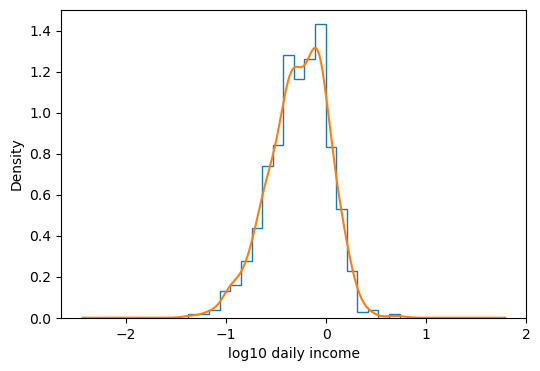

In [115]:
data.plot.hist(histtype='step', bins=20, density=True, figsize=(6,4))
data.plot.density() # set scale with bw_method = ...
pp.xlabel('log10 daily income')

Let's compare histograms for China and US, using log income. In 1965, there's basically no overlap! The poorest Americans are richer than the richest Chinese.

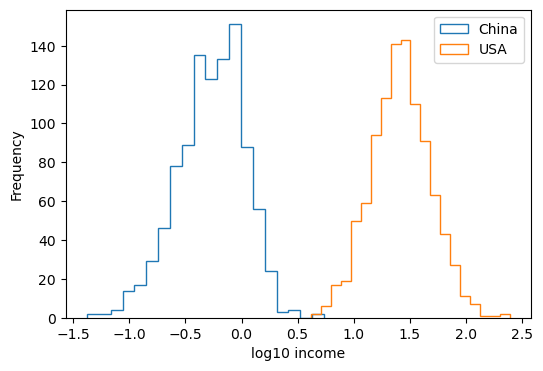

In [114]:
incomes.loc['China', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), label='China');
incomes.loc['USA', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, label='USA');
pp.xlabel('log10 income'); pp.legend();

To help us interpret this plot, we can redo the horizontal axis ticks with actual dollar values.

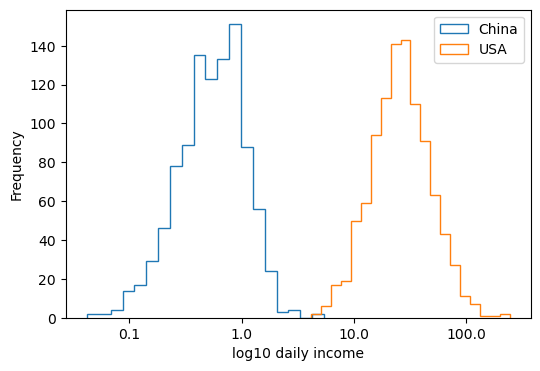

In [125]:
incomes.loc['China', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), label='China');
incomes.loc['USA', 1965].log10_daily.plot(kind='hist', histtype='step', bins=20, label='USA');

logs = np.array([-1,0,1,2]); pp.xticks(logs, 10.0**logs)
pp.xlabel('log10 daily income'); pp.legend();

In 2015 the situation is considerably different! Both the Chinese and Americans are richer, but there's also significant overlap.

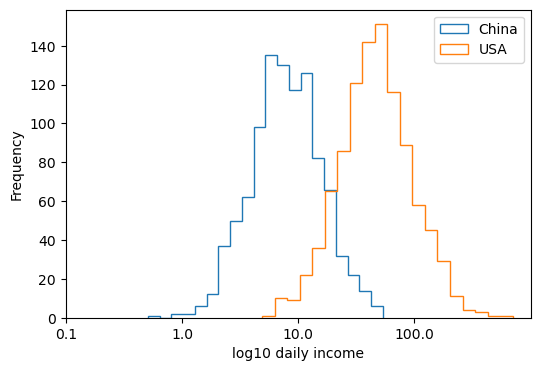

In [126]:
incomes.loc['China', 2015].log10_daily.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), label='China');
incomes.loc['USA', 2015].log10_daily.plot(kind='hist', histtype='step', bins=20, label='USA');

logs = np.array([-1,0,1,2]); pp.xticks(logs, 10.0**logs)
pp.xlabel('log10 daily income'); pp.legend();

Of course there are many more Chinese than Americans! Let's rescale the histograms using the respective populations. For that we need an array of weights of the same length of the data we are plotting. This is complicated enough that we prototype it step by step before piecing it together.

In [144]:
gm = pd.read_csv('gapminder2.csv')

Here's the data I wish to histogram.

In [148]:
data = incomes.loc["China", 2015].log10_daily

Here's the population of China in 2015

In [154]:
gm.query('country == "China" and year == 2015').population

7781    1.400000e+09
Name: population, dtype: float64

These are the weights. The query produces a Series of length one, but I just need a single value, otherwise I cannot multiply it with the array of ones.

In [155]:
gm.query('country == "China" and year == 2015').population.iloc[0] * np.ones_like(data) / len(data)

array([1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 1400000.,
       1400000., 1400000., 1400000., 1400000., 1400000., 14000

Thus every sample will represent approximately 1.4 million people! Finally:

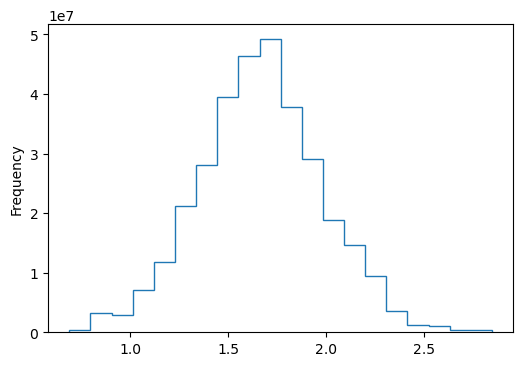

In [167]:
data.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), weights=weights);

Repeating for the two countries...

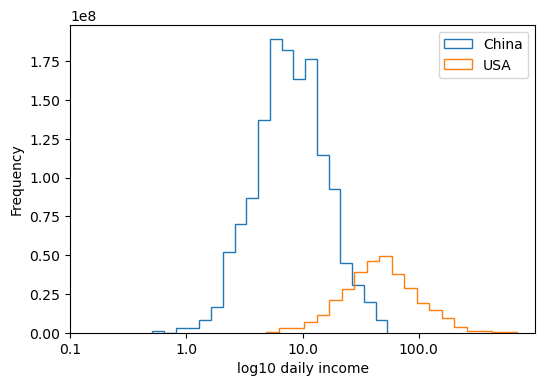

In [168]:
for country in ['China', 'USA']:
    data = incomes.loc[country, 2015].log10_daily
    
    population = gm.query('country == @country and year == 2015').population.iloc[0]
    weights = population * np.ones_like(data) / len(data)
    
    data.plot(kind='hist', histtype='step', bins=20, figsize=(6,4), weights=weights, label=country);

logs = np.array([-1,0,1,2]); pp.xticks(logs, 10.0**logs)

pp.xlabel('log10 daily income'); pp.legend();

Rosling points out, quite correctly, that there is a lot of purchasing power in the richer end of the Chinese population, so corporations would do well to tap that market.

You may have noticed that pandas plots are rather drab. Of course you're free to fine-tune them using matplotlib. An alternative is using the plotting functions of the library `seaborn` [https://seaborn.pydata.org], which allows you to pick a consistent style. However the names and options of the methods are slightly different than in pandas or matplotlib. However it's easy to google them, or to ask your favorite AI assistant.

In [274]:
import seaborn

# silence pandas warnings about methods that will change in the future
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [275]:
data_2015 = incomes.loc[pd.IndexSlice[:,2015], :].reset_index()

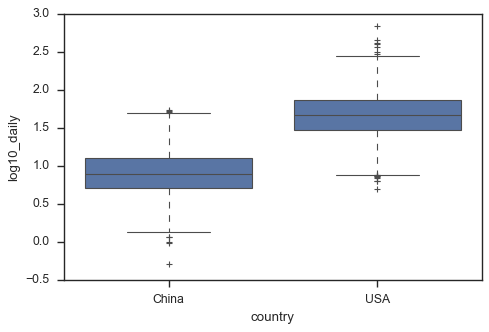

In [277]:
seaborn.set(style='ticks') # could be white, dark, whitegrid, darkgrid, ticks  
pp.figure(figsize=(6,4))
seaborn.boxplot(data=data_2015, x='country', y='log10_daily');

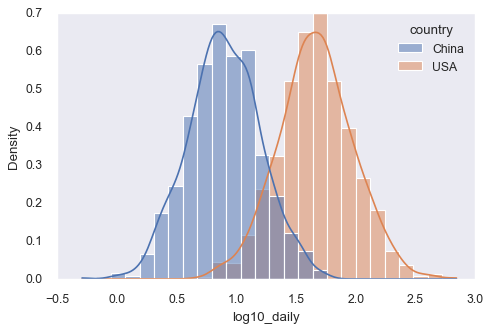

In [278]:
seaborn.set(style='dark')
pp.figure(figsize=(6,4))
seaborn.histplot(data=data_2015, x='log10_daily', hue='country', stat='density', kde=True);